In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
beers = pd.read_csv("./dataset_BeerReviews/RateBeer/beers.csv")
breweries = pd.read_csv("./dataset_BeerReviews/RateBeer/breweries.csv")
users = pd.read_csv("./dataset_BeerReviews/RateBeer/users.csv")

# Basic informations

In [6]:
# Display the first rows of the datasets to get to know the different variables
beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [7]:
breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [8]:
users.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


# Summury statistics

In [9]:
# Print raw statistics for significant variables in the different datasets
print(beers[['nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv', 'avg_computed', 'zscore', 'nbr_matched_valid_ratings','avg_matched_valid_ratings']].describe())

         nbr_ratings  overall_score    style_score            avg  \
count  442081.000000  104028.000000  104068.000000  395657.000000   
mean       16.110337      55.680817      54.986124       3.026580   
std        80.988812      28.482652      28.655427       0.304503   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000      34.000000      33.000000       2.870000   
50%         3.000000      53.000000      51.000000       3.020000   
75%         9.000000      83.000000      82.000000       3.180000   
max      5272.000000     100.000000     100.000000       4.520000   

                 abv   avg_computed        zscore  nbr_matched_valid_ratings  \
count  399987.000000  396690.000000  42228.000000              442081.000000   
mean        6.065485       3.244649     -0.104638                   2.308624   
std         1.922965       0.507520      0.732841                  26.621223   
min         0.010000       0.500000     -5.460346         

In [10]:
print(breweries[['nbr_beers']].describe())

          nbr_beers
count  24189.000000
mean      19.022655
std       31.542620
min        0.000000
25%        3.000000
50%        8.000000
75%       20.000000
max      295.000000


In [11]:
# Convert timestamp to datetime for joined variable in users dataset
users['joined'] = pd.to_datetime(users['joined'], unit='s')

# Extract year from 'joined' column
users['joined_year'] = users['joined'].dt.year

print(users[['nbr_ratings', 'joined_year']].describe())

        nbr_ratings   joined_year
count  70174.000000  70144.000000
mean     108.820945   2010.924256
std      754.493211      4.137188
min        1.000000   2000.000000
25%        1.000000   2008.000000
50%        2.000000   2012.000000
75%       10.000000   2014.000000
max    46749.000000   2017.000000


# Score distribution

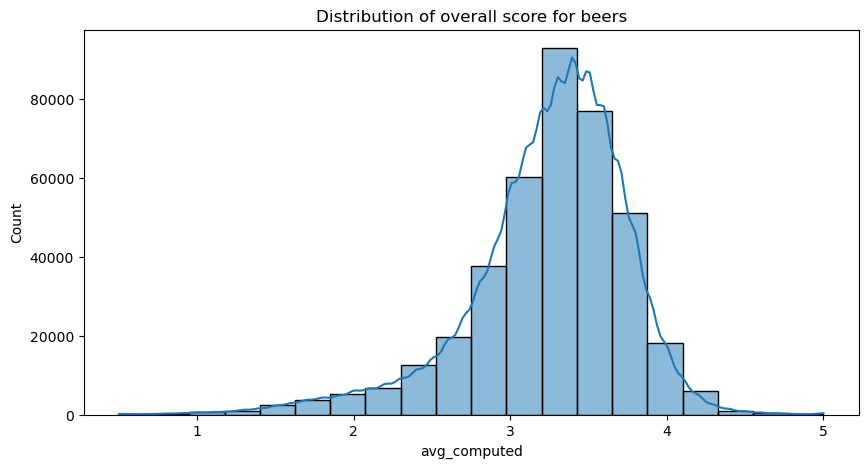

In [12]:
# Identify the overall score distribution of scores for beers
plt.figure(figsize=(10, 5))
sns.histplot(beers['avg_computed'], bins=20, kde=True)
plt.title('Distribution of overall score for beers')
plt.show()

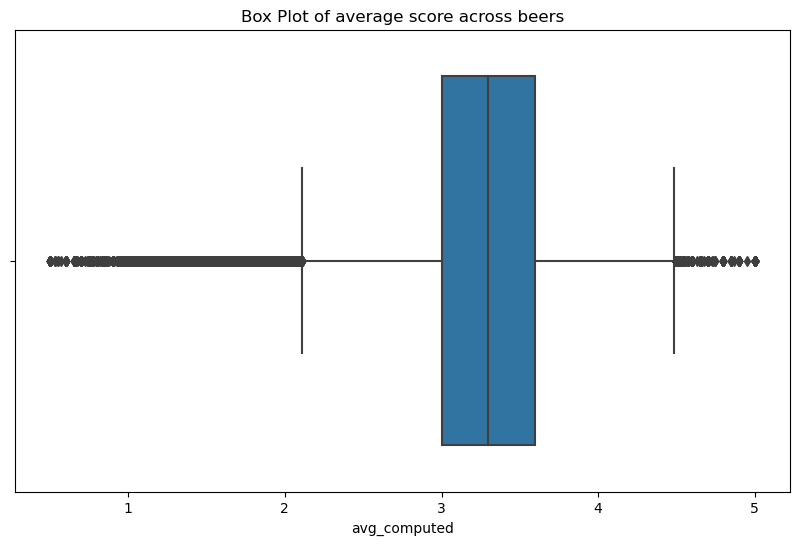

In [13]:
# Box plot of overall score for beers to get a visual summary of the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=beers['avg_computed'])
plt.title('Box Plot of average score across beers')
plt.show()

# Distribution of type of beers

Text(0.5, 1.0, 'Top 20 styles')

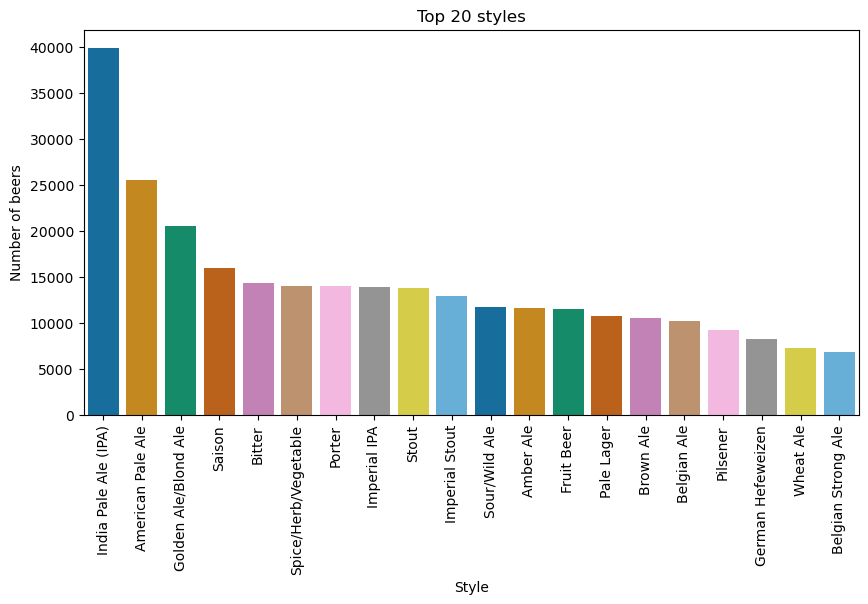

In [14]:
# Plot barplot of Top 20 styles
plt.figure(figsize=(10, 5))
sns.barplot(x=beers['style'].value_counts().head(20).index, y=beers['style'].value_counts().head(20).values, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.xlabel('Style')
plt.ylabel('Number of beers')
plt.title('Top 20 styles')

#Indentify the quantity of beers per style

Text(0.5, 1.0, 'Top 20 styles by average score')

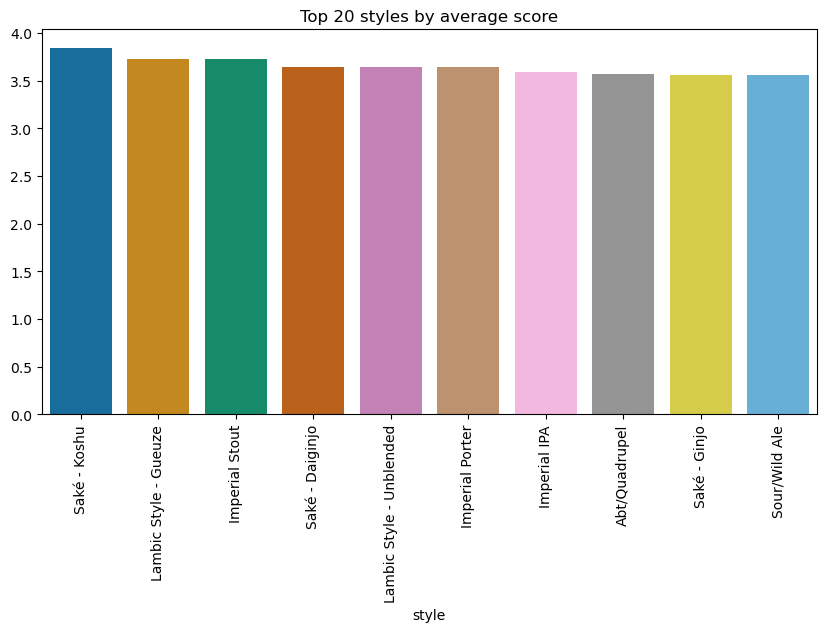

In [15]:
# Best rated styles
plt.figure(figsize=(10, 5))
sns.barplot(x=beers.groupby('style')['avg_computed'].mean().sort_values(ascending=False).head(10).index,
            y=beers.groupby('style')['avg_computed'].mean().sort_values(ascending=False).head(10).values, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.title('Top 20 styles by average score')

Text(0.5, 1.0, 'Distribution of average score by style for top 10 styles')

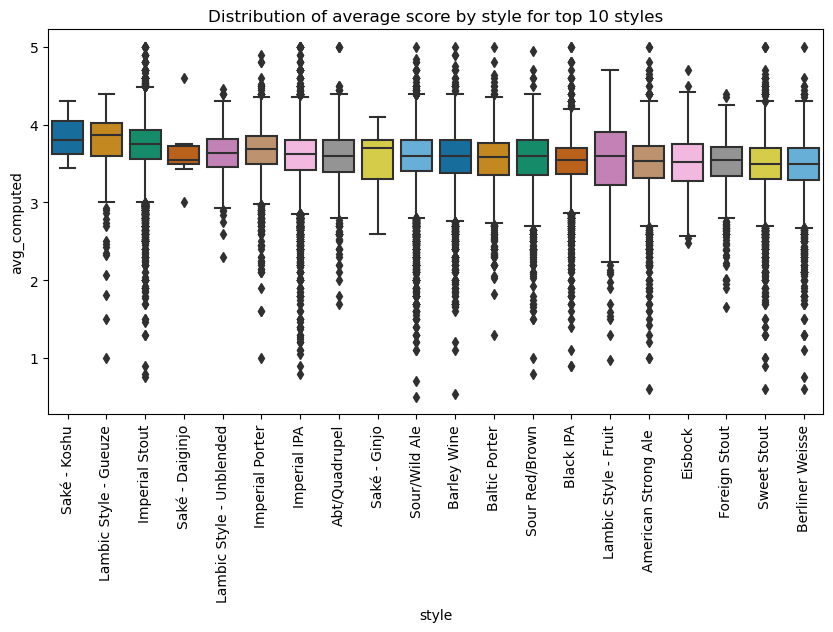

In [16]:
# Calculate the average for each style and take the top 20
style_order = beers.groupby('style')['avg_computed'].mean().sort_values(ascending=False).head(20).index

# Create the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='style', y='avg_computed', data=beers[beers['style'].isin(style_order)], order=style_order, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.title('Distribution of average score by style for top 10 styles')

# Identify the breweries with the most 5 rated beers

c:\Users\Charles\anaconda3\envs\ada\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


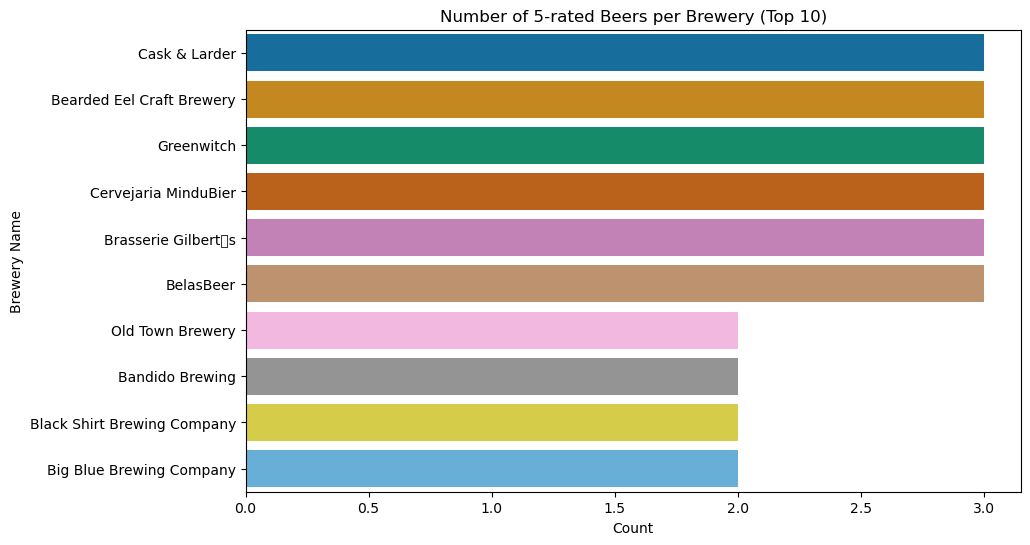

In [17]:
#Identify breweries with most 5 rated beers
beer_score_5 = beers[beers['avg_computed'] == 5]
# Count the occurrences of each brewery
brewery_counts = beer_score_5['brewery_name'].value_counts().nlargest(10)

# Create a DataFrame with the top 10 breweries and their counts
top_breweries = pd.DataFrame({'brewery_name': brewery_counts.index, 'count': brewery_counts.values})

# Create a histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='brewery_name', data=top_breweries, palette=sns.color_palette("colorblind"))
plt.title('Number of 5-rated Beers per Brewery (Top 10)')
plt.xlabel('Count')
plt.ylabel('Brewery Name')
plt.show()

# Identify the breweries with the best proportion of 5 rated beers

C:\Users\Charles\AppData\Local\Temp\ipykernel_91116\2219600956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries_5.rename(columns={'name': 'brewery_name'}, inplace=True)
c:\Users\Charles\anaconda3\envs\ada\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


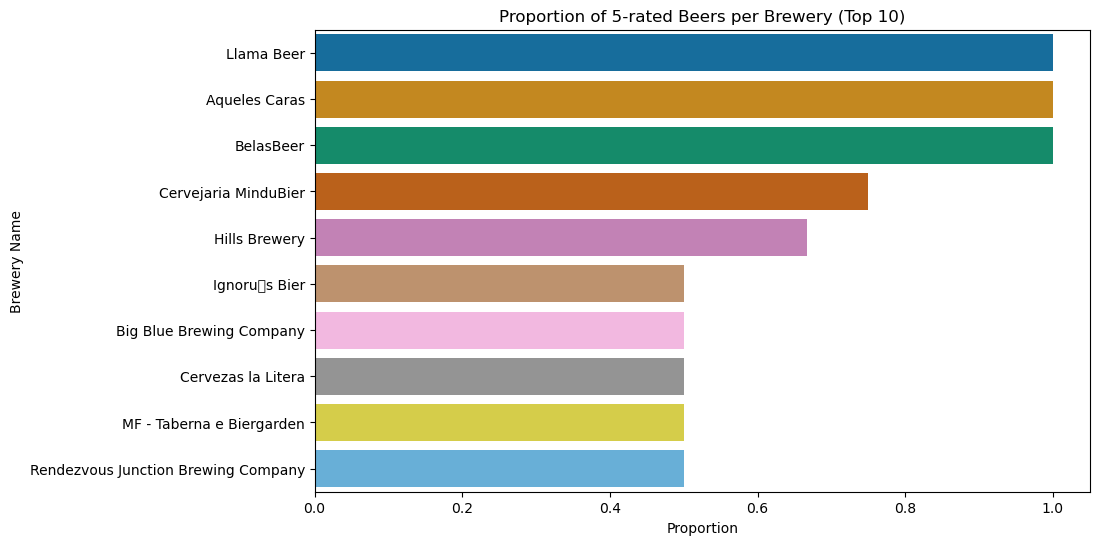

In [18]:
# Create dataframe for breweries with 5 rated beers
breweries_5 = breweries[breweries['id'].isin(beer_score_5['brewery_id'])]
breweries_5.rename(columns={'name': 'brewery_name'}, inplace=True)

# Isolate brewery infos 
brewery_counts_all = beer_score_5['brewery_name'].value_counts()
brewery_count_df = pd.DataFrame({'brewery_name': brewery_counts_all.index, 'count': brewery_counts_all.values})

# Determining the proportion of 5 rated beers

# Merge DataFrames on the 'brewery_name' column
proportion_of_5_df = pd.merge(breweries_5, brewery_count_df, on='brewery_name', how='inner')

# Exclude breweries with less than 2 beers to get meaningful proportions
proportion_of_5_df = proportion_of_5_df[proportion_of_5_df['nbr_beers'] >= 2]

# Perform division
proportion_of_5_df['proportion'] = proportion_of_5_df['count'] / proportion_of_5_df['nbr_beers']

# Taking Top 10 breweries
Top_10_breweries = proportion_of_5_df.sort_values('proportion', ascending=False).head(10)

# Create a histogram of the top 10 breweries with the most 5 rated beers ordered by proportion
plt.figure(figsize=(10, 6))
sns.barplot(x='proportion', y='brewery_name', data=Top_10_breweries, palette=sns.color_palette("colorblind"))
plt.title('Proportion of 5-rated Beers per Brewery (Top 10)')
plt.xlabel('Proportion')
plt.ylabel('Brewery Name')
plt.show()


# Number of beers in different locations

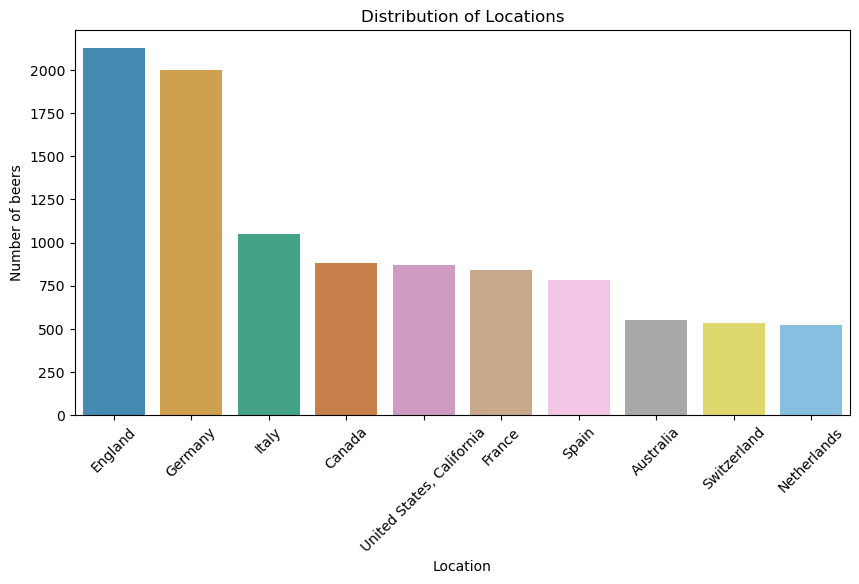

In [19]:
# Count the number of beers for each location
number_of_beer_per_country = breweries['location'].value_counts()
top_10_breweries_location = number_of_beer_per_country.nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_breweries_location.index, y=top_10_breweries_location.values, alpha=0.8, palette=sns.color_palette("colorblind"))
plt.title('Distribution of Locations')
plt.ylabel('Number of beers')
plt.xlabel('Location')
plt.xticks(rotation=45) 
plt.show()

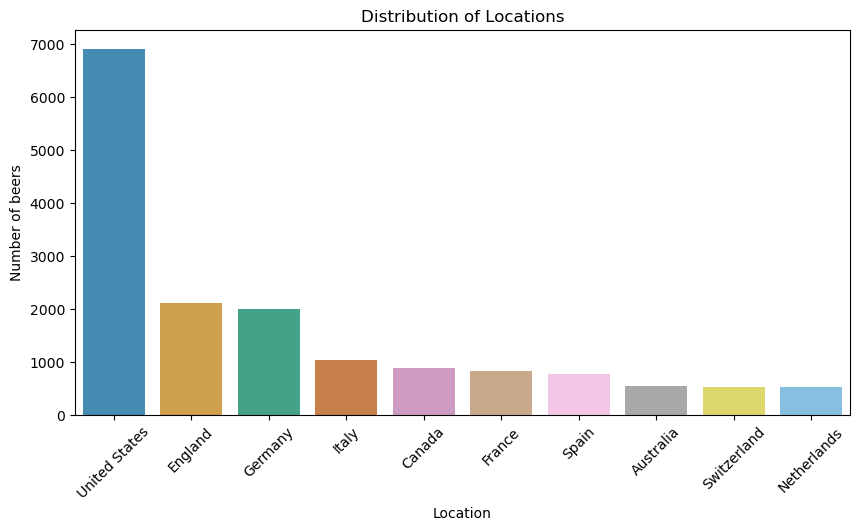

In [20]:
# Create a category that gathers all the US beers in one location

# Count number of beers in the US
nb_us_beers = breweries[breweries['location'].str.startswith('United States,')].value_counts().sum()

# Modify world wide beer count to gather all the US beers in one category 
us_filtered = number_of_beer_per_country[~number_of_beer_per_country.index.str.startswith('United States,')]
us_filtered.loc['United States'] = nb_us_beers

us_filtered = us_filtered.nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=us_filtered.index, y=us_filtered.values, alpha=0.8, palette=sns.color_palette("colorblind"))
plt.title('Distribution of Locations')
plt.ylabel('Number of beers')
plt.xlabel('Location')
plt.xticks(rotation=45) 
plt.show()

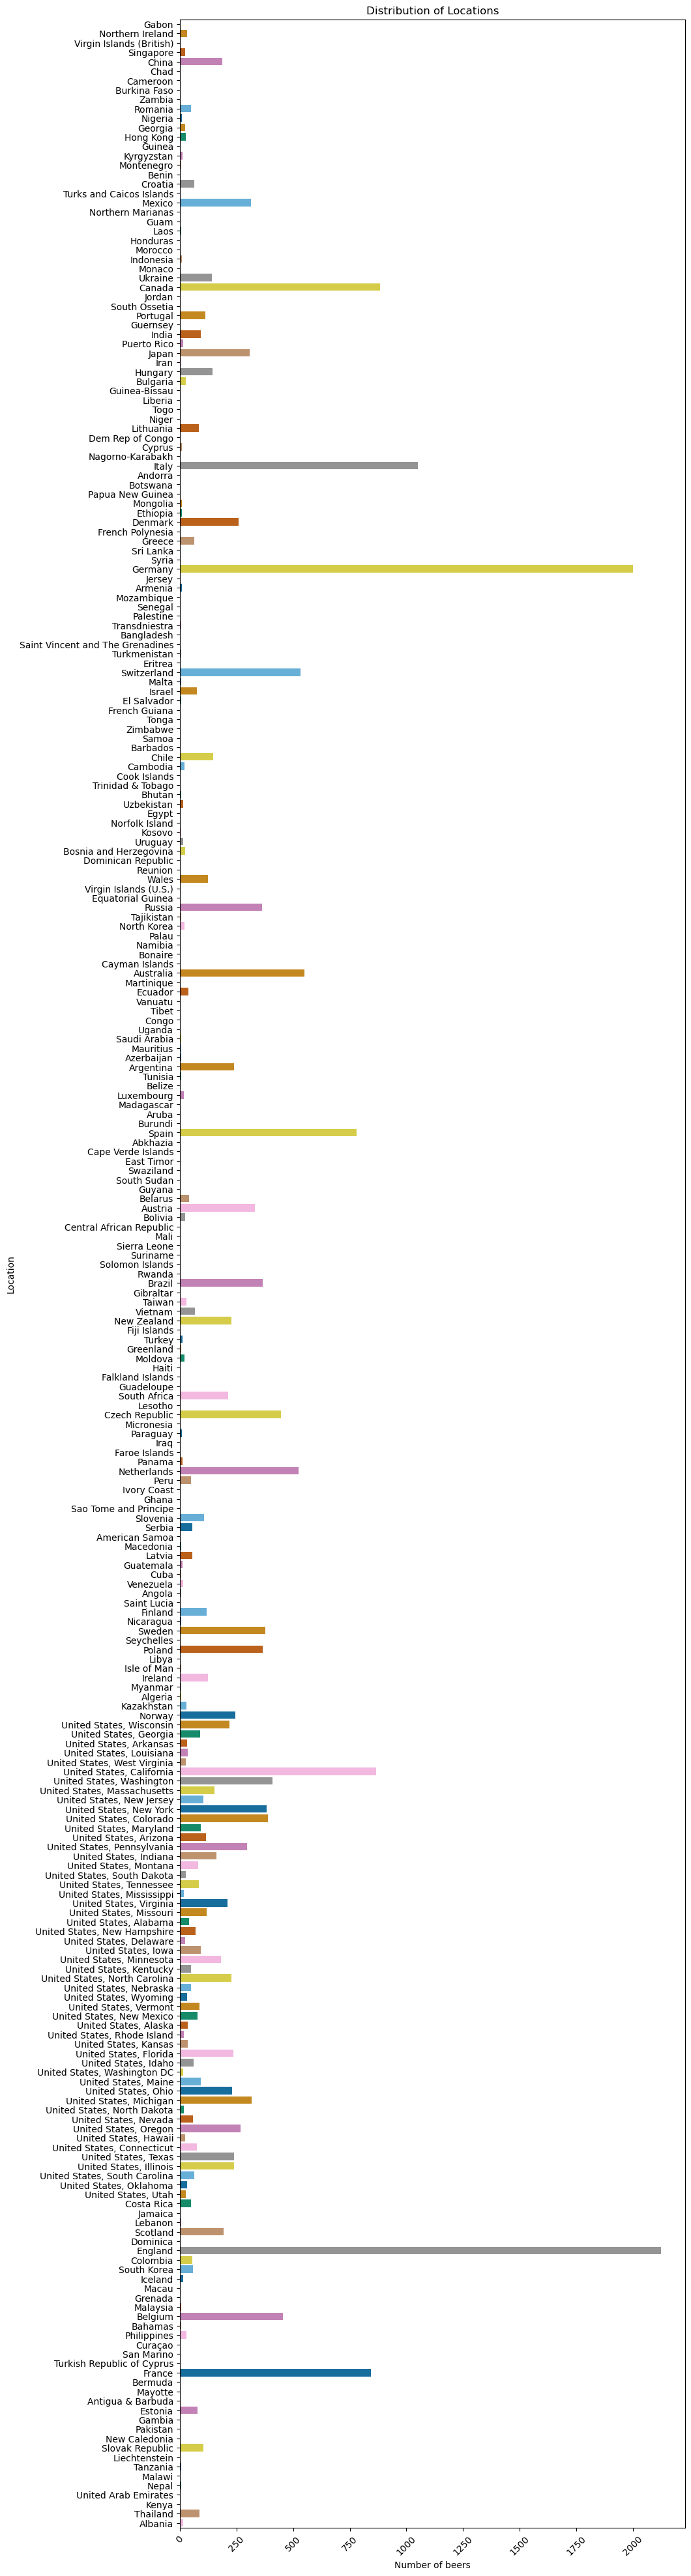

In [22]:
# Plot the entire distribution of locations

plt.figure(figsize=(10, 50))
sns.countplot(y='location', data=breweries, palette=sns.color_palette("colorblind"))
plt.title('Distribution of Locations')
plt.xlabel('Number of beers')
plt.ylabel('Location')
plt.xticks(rotation=45) 
plt.show()